In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Data Understanding

In [25]:
df = pd.read_csv("D:\\Datasets\\diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: ylabel='Frequency'>

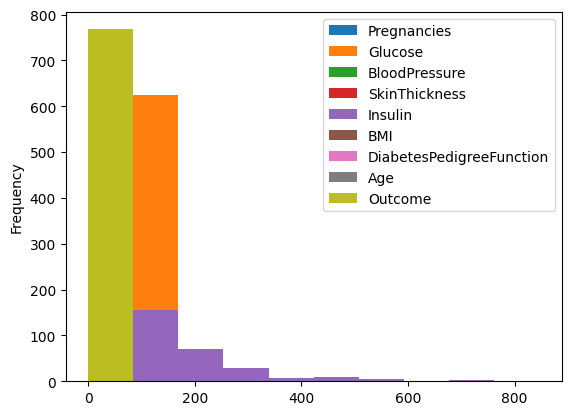

In [27]:
df.plot.hist()

# Checkng Data Types

In [28]:
data_types = df.dtypes
nuniqe = df.nunique()
d = pd.DataFrame({'Data Type':data_types , '# of unique':nuniqe}).T
d


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Data Type,int64,int64,int64,int64,int64,float64,float64,int64,int64
# of unique,17,136,47,51,186,248,517,52,2


# Handling Null values

In [29]:
nulls = df.isnull().sum()
n=pd.DataFrame({'Null values':nulls}).T
n

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Null values,0,0,0,0,0,0,0,0,0


# Handling outliers

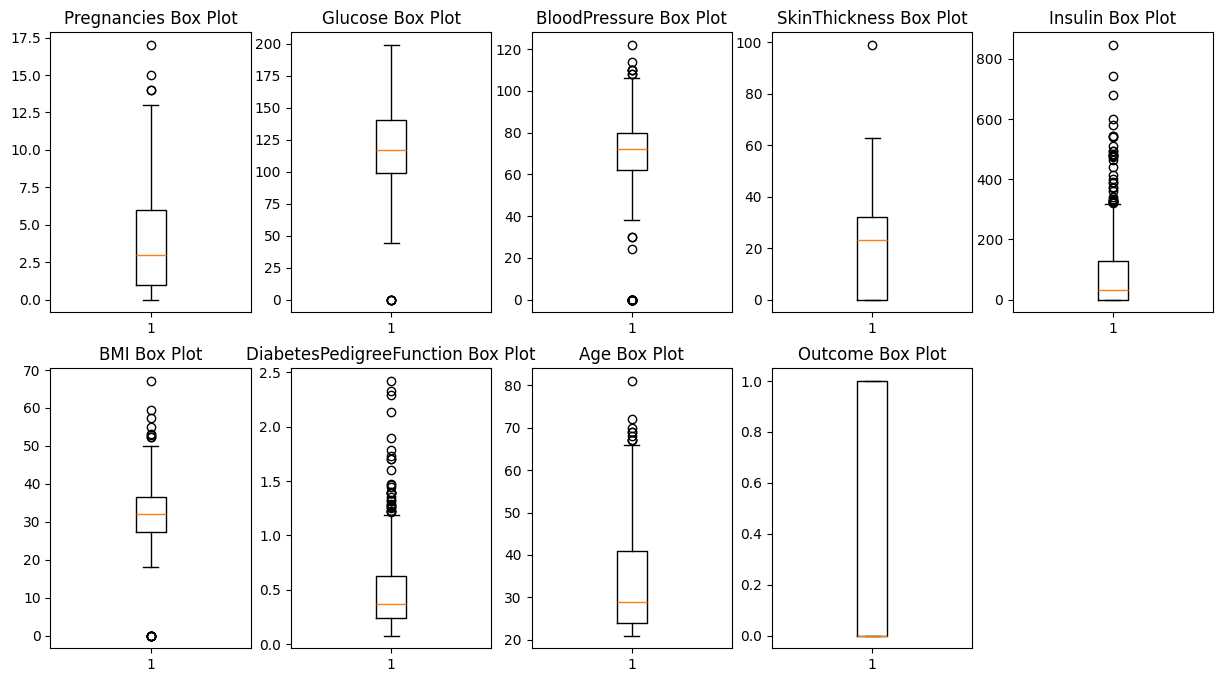

In [30]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(15,8))
for i , col in enumerate(Numeric_columns):
    plt.subplot(2,5,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show()

In [31]:
for col in Numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR
    lowOutlier = df[df[col] < LO_FENNCE][col].values
    upOutlier = df[df[col] > UP_FENNCE][col].values
    df[col].replace(lowOutlier, LO_FENNCE, inplace=True)
    df[col].replace(upOutlier, UP_FENNCE, inplace=True)

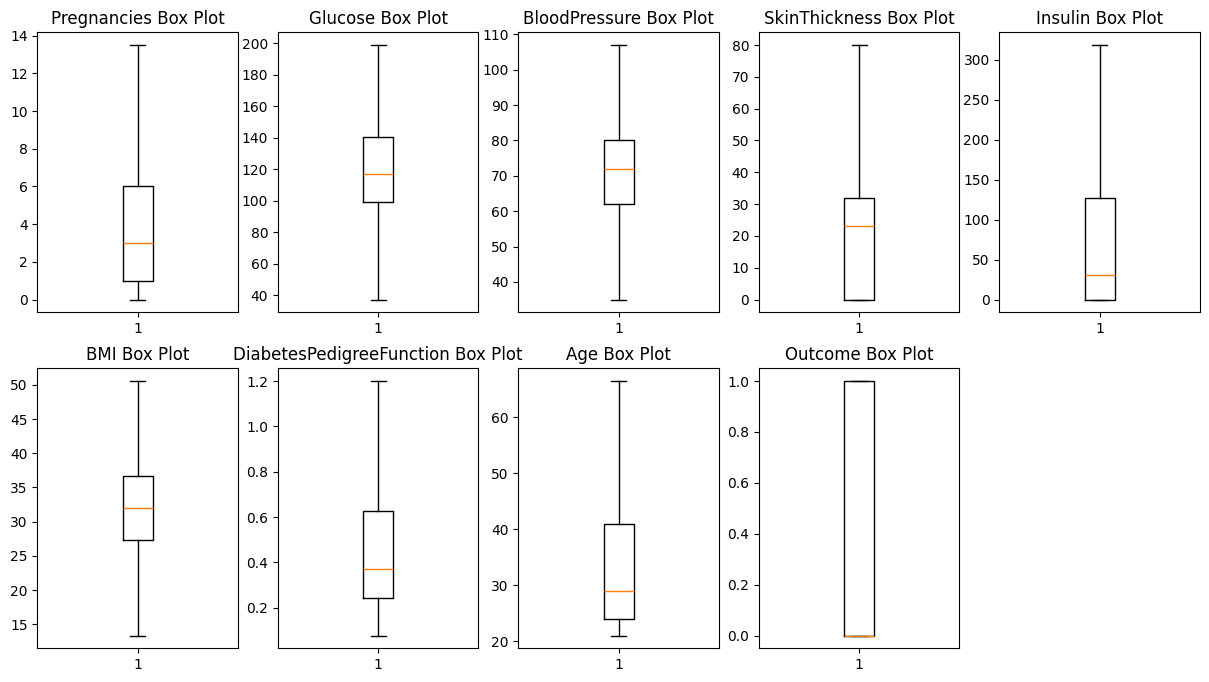

In [32]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(15,8))
for i , col in enumerate(Numeric_columns):
    plt.subplot(2,5,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col} Box Plot')
plt.show()

# Visualization

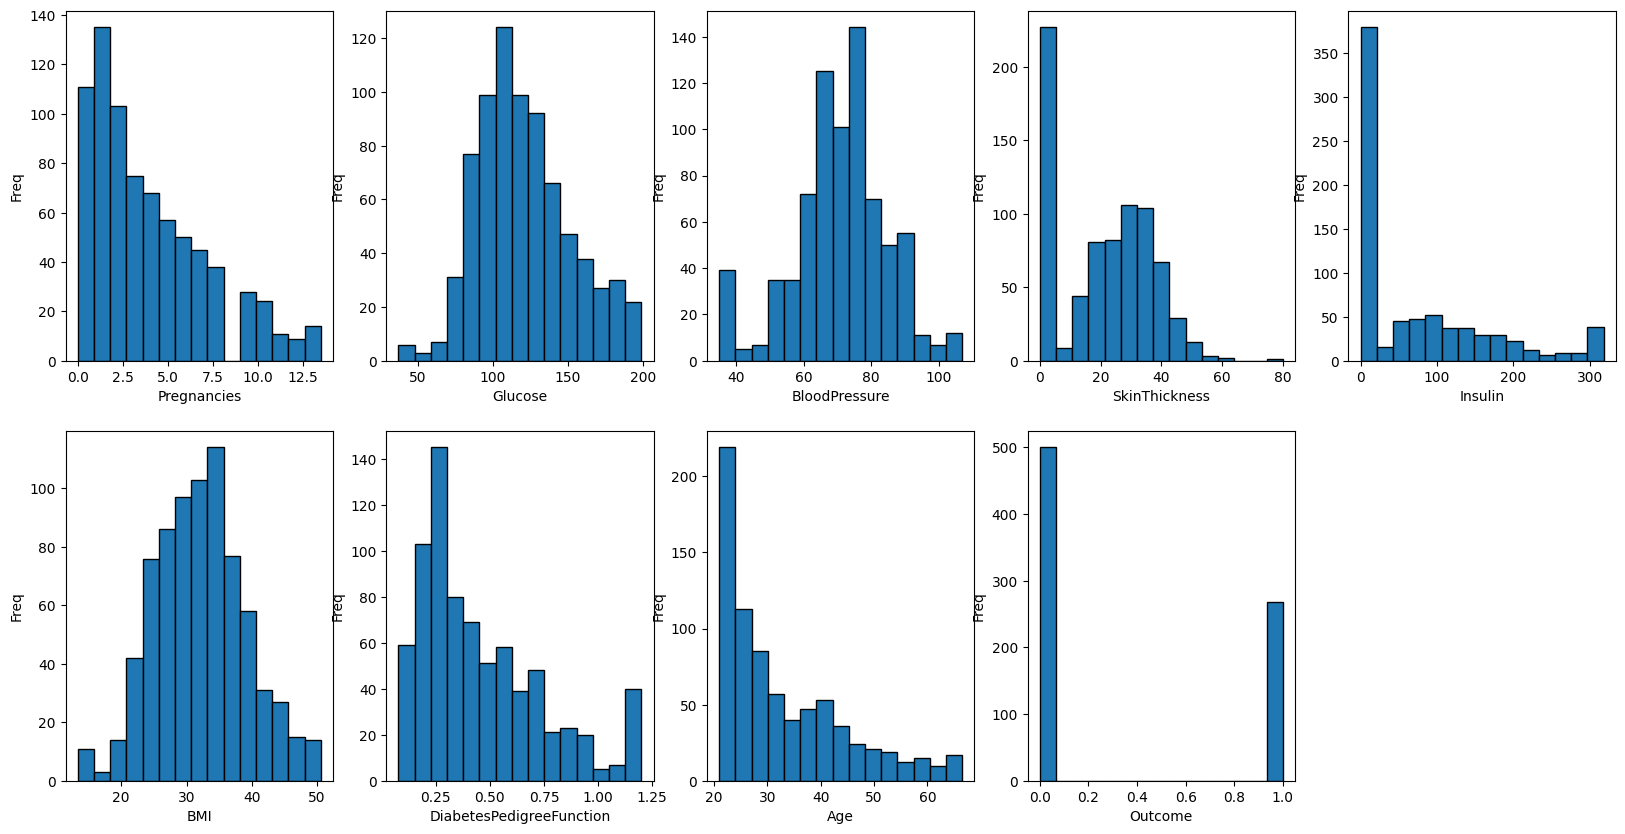

In [33]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,10))
for i , col in enumerate(Numeric_columns):
    plt.subplot(2,5,i+1)
    plt.hist(df[col] , edgecolor='k' , bins=15)
    plt.xlabel(col)
    plt.ylabel('Freq')
plt.show()

# Removing Dublicates

In [34]:
df.duplicated().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Data spliting

In [36]:
x = df.drop(['Outcome'] , axis=1)
y = df[['Outcome']]

In [37]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [38]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


# Normalization

In [39]:
from sklearn.preprocessing import MinMaxScaler
numCol = df.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])

df.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363,1.0
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780,0.0
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758,1.0
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000,0.0
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736,1.0
5,0.370370,0.487259,0.541667,0.0000,0.000000,0.329301,0.109626,0.197802,0.0
6,0.222222,0.252510,0.208333,0.4000,0.276621,0.474462,0.151515,0.109890,1.0
7,0.740741,0.481081,0.000000,0.0000,0.000000,0.590054,0.049911,0.175824,0.0
8,0.148148,0.987645,0.486111,0.5625,1.000000,0.461022,0.071301,0.703297,1.0
9,0.592593,0.542857,0.847222,0.0000,0.000000,0.000000,0.137255,0.725275,1.0


# Encoding

In [40]:
# There is no catogrical columns to be encoded

# (Linear Regression Model) , Target=Outcome 

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,confusion_matrix


# Selecting features and target
X = df.drop(['Outcome'], axis=1)  
y = df['Outcome']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
Real_VS_Predict = pd.DataFrame({'real': y_test, 'predicted': np.round(y_pred)})

#Evaluation Metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

#Result
print("Mean Squared Error:", MSE)
print("Mean Absolute Error:",MAE)
print("R² Score:", R2)
Real_VS_Predict.corr()


Mean Squared Error: 0.15300853446150603
Mean Absolute Error: 0.32395828334337967
R² Score: 0.33356282767877343


,real,predicted
real,1.000000,0.578152
predicted,0.578152,1.000000


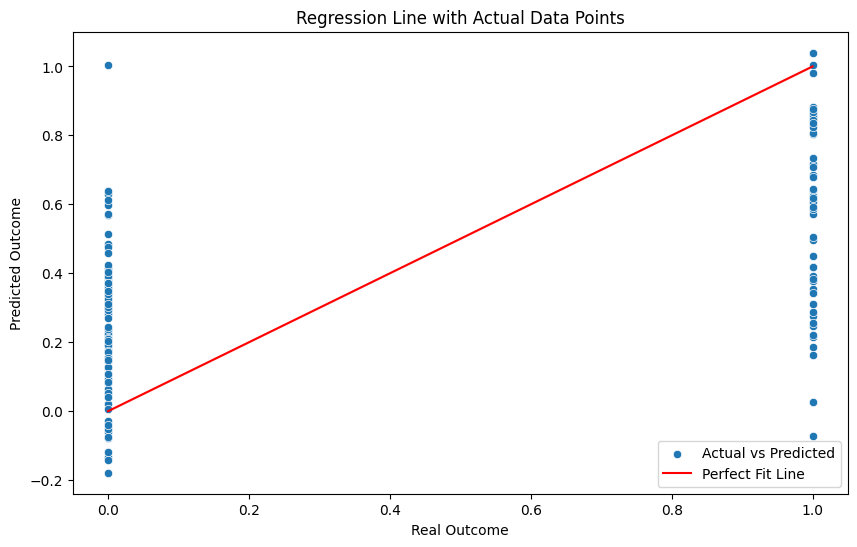

In [42]:
# Plotting the regression line with actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit Line')
plt.xlabel('Real Outcome')
plt.ylabel('Predicted Outcome')
plt.title('Regression Line with Actual Data Points')
plt.legend()
plt.show()

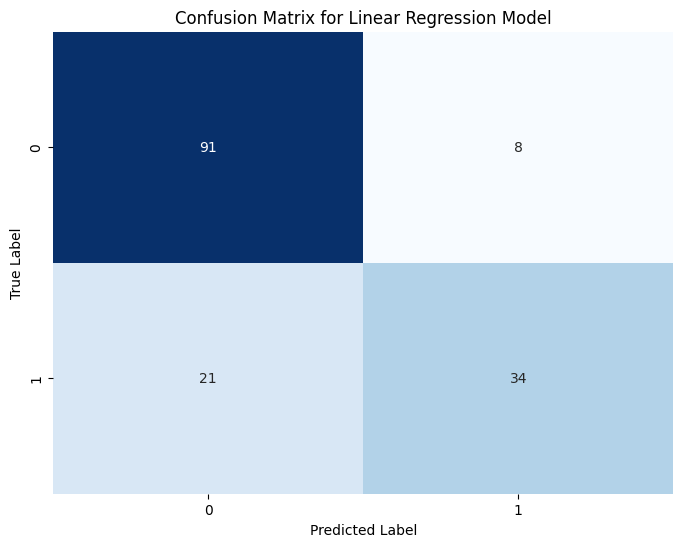

In [43]:
LR_CM = confusion_matrix(y_test.values, np.round(y_pred))
# Function to plot confusion matrix as heatmap
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix(LR_CM, "Linear Regression Model")

# (Polynomial Regression)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selecting features and target
X = df.drop(['Outcome'], axis=1)  
y = df['Outcome']

# Creating polynomial features 
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=12)



# Creating and training the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Making predictions
y_pred = model.predict(X_test)
Real_VS_Predict = pd.DataFrame({'real': y_test, 'predicted': np.round(y_pred)})

# Evaluation Metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Result
print("Mean Squared Error:", MSE)
print("Mean Absolute Error:", MAE)
print("R² Score:", R2)
Real_VS_Predict.corr()




Mean Squared Error: 0.16829435041740393
Mean Absolute Error: 0.3197376169667386
R² Score: 0.2669846070708627


,real,predicted
real,1.000000,0.515339
predicted,0.515339,1.000000
